In [21]:
using QuantumOptics
using PyPlot
using Statistics
using LinearAlgebra
using CollectiveSpins

# MPC Computations

### Defining the system

In [22]:
# Define geometry of system
Nx,Ny,Nz = [5,5,3]
N = Nx*Ny*Nz;
d_xy, d_z = 266., 532. # Optical lattice spacing in nm

# Define computation variables
Lambda_array = [583, 631, 841, 1299]
Γ0 = 1. # SE decay rate
Tstep, Tend = 1e-3, 3 # Normalised by Γ0
T = [0:Tstep:Tend;];

In [23]:
# Prepare the initial state
phi = 0.
theta = 0.
Ψ0 = CollectiveSpins.mpc.blochstate(phi, theta, N);

### Computations

In [24]:
# Compute decay rate for all λ
ρt_array_MPC = []

for i in 1:size(Lambda_array)[1]
    println(string(i)*"/"*string(size(Lambda_array)[1]))

    # Redefine the system
    a_dim,b_dim,c_dim = [d_xy,d_xy,d_z]/Lambda_array[i]
    geo = CollectiveSpins.geometry.box(a_dim,b_dim,c_dim;Nx=Nx,Ny=Ny,Nz=Nz)
    e = [0,0,1]   # Quantization axis
    system = CollectiveSpins.SpinCollection(geo, e, gammas=1.)

    # Compute the time MPC evolution
    push!(ρt_array_MPC, CollectiveSpins.mpc.timeevolution(T, system, Ψ0, dt=Tstep)[2])
end

1/4
2/4
3/4
4/4


In [25]:
# Compute in the independent case
Ψ0_ind = CollectiveSpins.independent.blochstate(phi, theta, N)
a_dim,b_dim,c_dim = [d_xy,d_xy,d_z] # Dimensions do not matter, independent case
geo = CollectiveSpins.geometry.box(a_dim,b_dim,c_dim;Nx=Nx,Ny=Ny,Nz=Nz)
e = [0,0,1];   # Quantization axis
system = CollectiveSpins.SpinCollection(geo, e, gammas=1.)
tout, ρt_ind = CollectiveSpins.independent.timeevolution(T, system, Ψ0_ind, dt=Tstep);

In [26]:
# Compute <σz> for each λ and each t
Szt_MPC = [[CollectiveSpins.mpc.sz(ρ) for ρ in ρt_array_MPC[i]] for i = 1:length(Lambda_array)]
meanSzt_MPC = [[mean(subarray) for subarray in Szt_MPC[i]] for i = 1:length(Lambda_array)]
meanSzt_MPC = [-1 .*(meanSzt_MPC[i].+1) ./2 .- 6 for i = 1:length(Lambda_array)]
decayRatet_MPC = [diff(meanSzt_MPC[i])/Tstep for i = 1:length(Lambda_array)];

# Compute the independent case
Szt_ind = [CollectiveSpins.independent.sz(ρ) for ρ in ρt_ind]
meanSzt_ind = [mean(subarray) for subarray in Szt_ind]
meanSzt_ind = -1 .*(meanSzt_ind.+1) ./2 .- 6;
decayRatet_ind = diff(meanSzt_ind)/Tstep;

### Plots

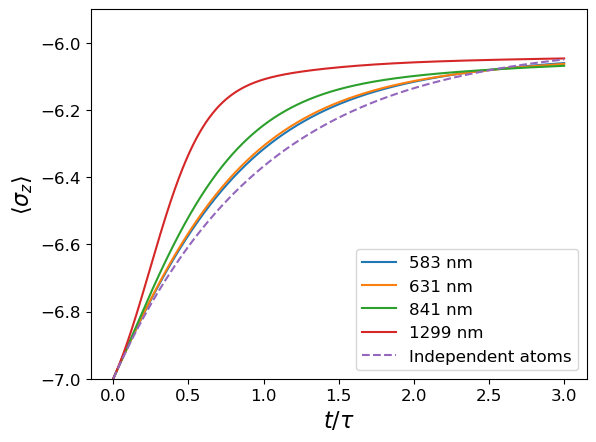

In [27]:
close("all")
figure()

PyPlot.rc("font", size = 12)

for i in 1:size(Lambda_array)[1]
    plot(T, meanSzt_MPC[i], label=string(Lambda_array[i])*" nm")
end

PyPlot.yticks([-7:0.2:-6;])

plot(T, meanSzt_ind, label=string("Independent atoms"), linestyle="--")


#title("Evolution of the mean spin for fully inverted system")
xlabel(L"t/\tau", fontsize=16)
ylabel(L"\langle \sigma_z\rangle", fontsize=16)
legend()
savefig("/Users/remy/Documents/Remy/ENSL_2024_2025/Stage_M2/Rapport_Stage_M2/Figures/Pop_decay_mean_sigmaz.pdf", bbox_inches="tight")
ylim((-7, -5.9))
pygui(false); gcf()

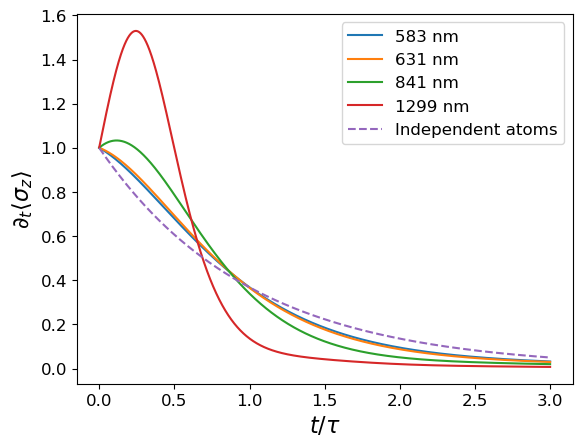

In [30]:
close("all")
figure()

for i in 1:size(Lambda_array)[1]
    plot(T[1:end-1], decayRatet_MPC[i], label=string(Lambda_array[i])*" nm")
end

plot(T[1:end-1], decayRatet_ind, label=string("Independent atoms"), linestyle="--")
#title("Rates of the mean spin for fully inverted system")
xlabel(L"t/\tau", fontsize=16)
ylabel(L"\partial_t\langle \sigma_z\rangle", fontsize=16)
legend()

savefig("/Users/remy/Documents/Remy/ENSL_2024_2025/Stage_M2/Rapport_Stage_M2/Figures/Pop_decay_diff_mean_sigmaz.pdf", bbox_inches="tight")

pygui(false); gcf()